<a href="https://colab.research.google.com/github/Jiajun-JJ-Yuan/Demos-and-More/blob/main/Deelp_Learning_Demo_Worker_Attrition_Prediction_with_TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# {"username":"jiajunjjyuan","key":"b4e80e693b6f0aadd982c78d9466bd03"}
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [4]:
#download a popular HR dataset from Kaggle
import kagglehub

path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


In [5]:
# import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# make sure i'm seeing all the columns when doing overviews
pd.set_option('display.max_columns', None)

In [6]:
# the path into df
df = pd.read_csv(path + "/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [7]:
# Preview the first few rows of the data
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Most columns are pretty straightforwards, but I'll need to continue cleaning the data for missing data or unnecessary columns

In [8]:
# check all column types and missing data
df.info()
# check descriptives
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# I want to remove columns that are either 1) not explained, 2) not relevant to attrition prediction, 3) have only one value or 4) are duplicative
# 2) EmployeeNumber is not relevant to the prediction
df.drop(columns=['EmployeeNumber'], inplace=True)
# 3) variables like EmployeeCount, StandardHours, and Over18 only have one value for everyone
df.drop(columns=['EmployeeCount','StandardHours','Over18'], inplace=True)
# 4) for example, DailyRate, HourlyRate, MonthlyIncome, MonthlyRate should all describe compensation, so we want to minimize multicollinearity
# The conversions between DailyRate and HourlyRate for example are not linear, so I'll keep only HourlyRate because it intuitively has less likelihood for other variabilities
df.drop(columns=['DailyRate','MonthlyIncome','MonthlyRate'], inplace=True)

display(df.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,9,No,12,3,4,1,6,3,3,2,2,2,2


In [10]:
# Calculate attrition count
attrition_counts = df['Attrition'].value_counts()
print("Attrition Counts:")
print(attrition_counts)

# Calculate percentage attrition
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition Percentage:")
print(attrition_percent.round(2))

Attrition Counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition Percentage:
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64


In [11]:
# converting all categorical variables to the category type
for col in df.columns:
    if df[col].dtype != 'int64':
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EnvironmentSatisfaction   1470 non-null   int64   
 8   Gender                    1470 non-null   category
 9   HourlyRate                1470 non-null   int64   
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64 

In [12]:
# check all categorical variables to see if they should be ordered
cat_cols = df.select_dtypes(include=['category']).columns
for col in cat_cols:
    print(f"Column: {col}")
    print("Categories:", df[col].cat.categories.tolist())

Column: Attrition
Categories: ['No', 'Yes']
Column: BusinessTravel
Categories: ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Column: Department
Categories: ['Human Resources', 'Research & Development', 'Sales']
Column: EducationField
Categories: ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Column: Gender
Categories: ['Female', 'Male']
Column: JobRole
Categories: ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
Column: MaritalStatus
Categories: ['Divorced', 'Married', 'Single']
Column: OverTime
Categories: ['No', 'Yes']


In [13]:
# business travel is the only variable that should be ordered
df['BusinessTravel'] = pd.Categorical(df['BusinessTravel'], categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
# I'll also add coded variables (factors) for model building
for col in df.select_dtypes(include=['category']).columns:
    df[f"{col}_code"] = df[col].cat.codes
display(df.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_code,BusinessTravel_code,Department_code,EducationField_code,Gender_code,JobRole_code,MaritalStatus_code,OverTime_code
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1,1,2,1,0,7,2,1
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,1,No,23,4,4,1,10,3,3,10,7,1,7,0,2,1,1,1,6,1,0
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1,1,1,4,1,2,2,1
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0,2,1,1,0,6,1,1
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,9,No,12,3,4,1,6,3,3,2,2,2,2,0,1,1,3,1,2,1,0


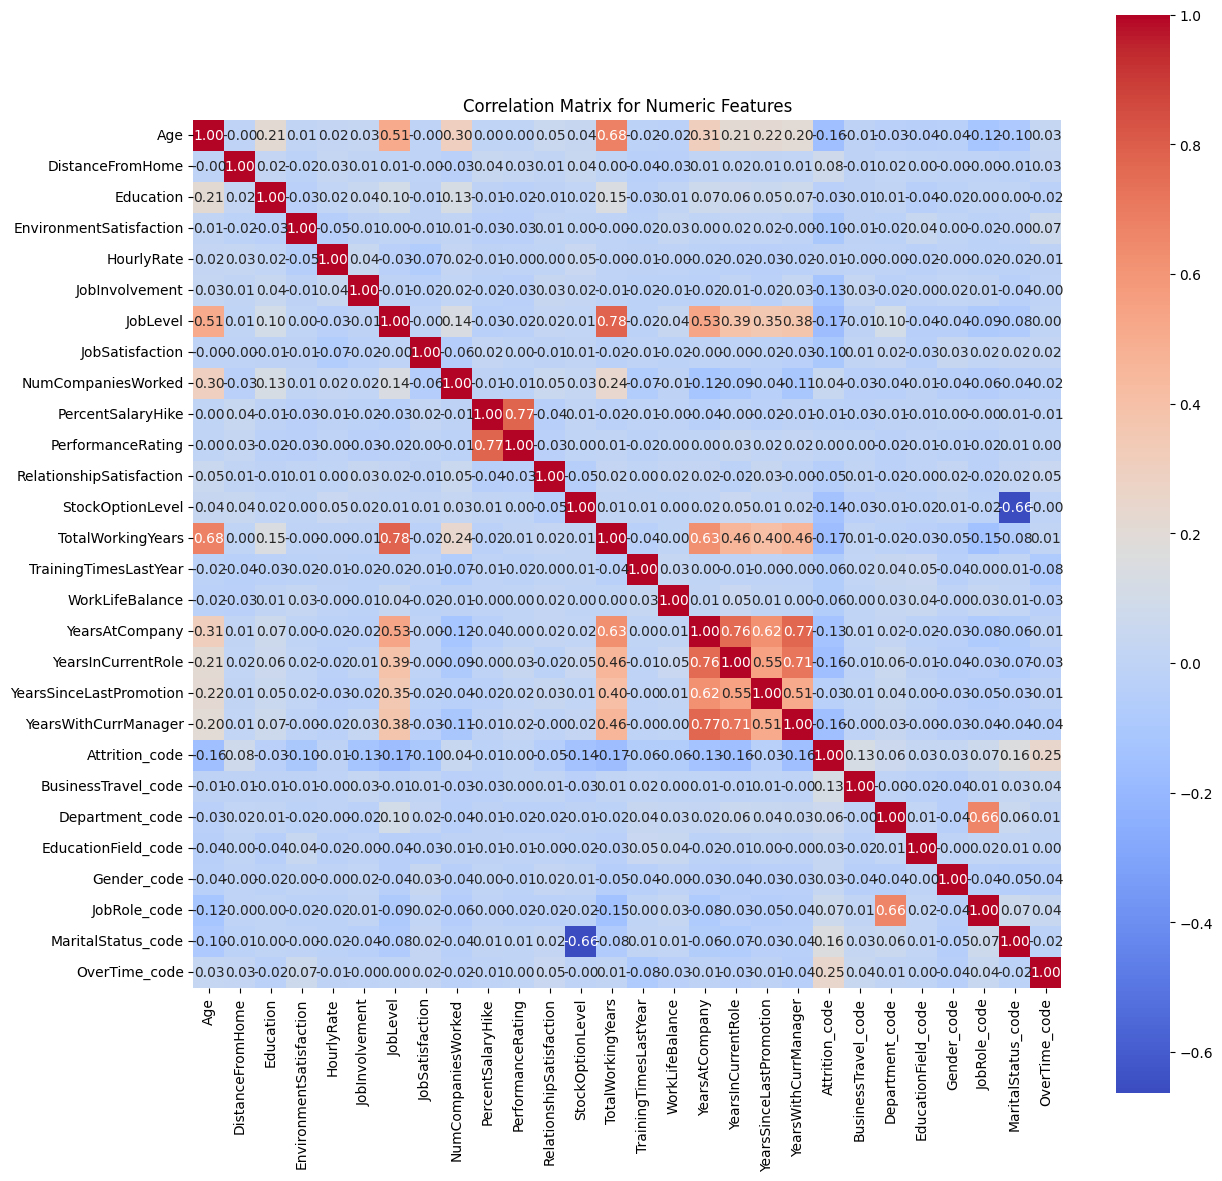

In [14]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64','int8']).columns

# Compute correlations
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

There are some pockets that highly correlate with each other, but they are still different variables (unlike the compensation variables which are just different ways of looking at the same thing). I'm keeping all the variables as this point for now.

In [15]:
# ready to split the data at this point
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# create a df just for the model
df_model = df.drop(columns = df.select_dtypes(include=['category']).columns)
#df_model.info()

In [16]:
X = df_model.drop(columns=['Attrition_code'])  # All predictors
y = df_model['Attrition_code'] # Dependent variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize the features (helps with neural network training)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_scaled.shape[1],)),  # Input layer matching the number of features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with binary crossentropy loss and the Adam optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Introduce early stopping to avoid overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                           patience=5,  # Stop if no improvement for 5 epochs
                           restore_best_weights=True)

# The parameters look right. Time to train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8311 - loss: 0.4873 - val_accuracy: 0.8390 - val_loss: 0.4291
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8368 - loss: 0.4432 - val_accuracy: 0.8390 - val_loss: 0.4068
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8352 - loss: 0.4202 - val_accuracy: 0.8390 - val_loss: 0.3898
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8319 - loss: 0.4039 - val_accuracy: 0.8432 - val_loss: 0.3778
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8276 - loss: 0.3856 - val_accuracy: 0.8517 - val_loss: 0.3667
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8101 - loss: 0.3916 - val_accuracy: 0.8602 - val_loss: 0.3566
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8366 - loss: 0.3791 - val_accuracy: 0.8686 - val_loss: 0.3493
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8267 - loss: 0.3836 - val_accuracy: 0.8686 - val_loss

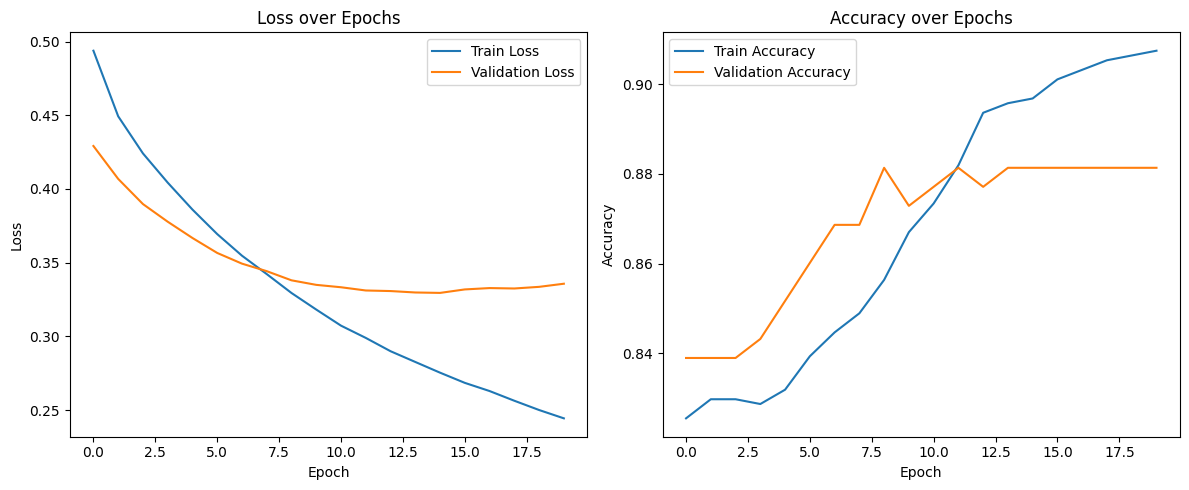

In [31]:
# Plotting the training history in terms of loss and accuracy over Epochs
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 89.80%


The test accuracy was good, but I need a confusion matrix to really understand the results.

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Determine what constitutes a predicted attrition, I'm using .4
y_pred = (model.predict(X_test_scaled) > 0.4).astype("int32")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
[[240  16]
 [ 16  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       256
           1       0.58      0.58      0.58        38

    accuracy                           0.89       294
   macro avg       0.76      0.76      0.76       294
weighted avg       0.89      0.89      0.89       294



The model seemed to produce reliable predictions of true negatives (correctly predicts who would not leave). The prediction of true positives was not great at about 60%, but organizationally it works well. Out of 294 people, the organization should pay attention to 38 of them for a potential attrition, which is manageable.

Even though the model performed well, there were over 20 predictors of attrition and I won't know which is more important unless I open up the black box of the neural network. Leaders are likely more interested than the important predictors than a difficult-to-understand model alone.

In [44]:
import shap

# Define a wrapper function as suggested by shap documentations
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/neural_networks/Census%20income%20classification%20with%20Keras.html
# This function accepts a 2D numpy array and returns the model's predicted probabilities (flattened to 1D).
def f(X):
    return model.predict(X).flatten()

# Choose a subset of the training data
background = X_train_scaled[:100]

# Follow the documentation for the explainer
explainer = shap.KernelExplainer(f, background)

# Compute SHAP values for 200 test samples 500 times (resampling)
shap_values = explainer.shap_values(X_test_scaled[:200], nsamples=500)

# Calculate the mean absolute SHAP value for each feature across the 200 test samples.
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)

# Create a DataFrame with the feature names and their corresponding mean absolute SHAP values.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Mean Absolute SHAP Value": mean_abs_shap
}).sort_values(by="Mean Absolute SHAP Value", ascending=False)

# Print the ranked list of predictors.
print("Ranked Feature Importance (based on mean absolute SHAP values):")
print(feature_importance)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

SHAP values do not work the same as traditional regression values thus do not have traditional p values. We can still interpret the results in that the most important predictors were overtime, environment satisfaction, job involvement, and job satisfaction.

Here are some example interventions to address each of these variables:
1.   **Overtime**. Can be separated into two buckets: 1) reduce/eliminate the need for overtime and 2) make overtime environment more positive.
* For the former, the org can identify teams/individuals with more overtime and understand the reasons, which could be lack of resources (addressed by providing more resources), mandatory to the job (establish realistic job preview in employee selection), or mismanagement (manager training on workload distribution).
* For the latter, there can be additional surveys or focus groups on these individuals to understand ways to make overtime more enjoyable, which could be increasing schedule flexibility, remote work flexibility, higher overtime compensation, and etc.
2.   **Environment Satisfaction** and **Job Satisfaction**. Because I don't have the scale used to measure environment and job satisfaction, it's difficult to know what exactly the constructs mean. From the surface level, these two constructs are typically considered as outcome variables rather than predictor variables, meaning that they are affected by specific predictors, such as compensation, workplace safety, workload, etc. Example interventions include employee recognition programs, development programs, and perks.
4.   **Job Involvement**. I also do not have the scale for job involvement, but it likely represents how committed employees are to their jobs. One possible intervention is job redesign, which allows the workers to receive more task feedback, task identification, autonomy, etc. Another intervention is through establishing mentorship programs, enabling workers to connect with others at their job as a way of receiving knowledge, advice, and support.


